# 문제 개요

이 문제는 실제 Programmers 채용 공고 페이지를 방문한 개발자들의 방문/지원 기록을 바탕으로 추천모델을 만들어보는 것이다. 참고로 모든 데이터는 익명화되었음을 밝힌다. 구체적으로 개발자(userID로 표현됨)와 채용공고(jobID로 표현됨)를 보고 개발자가 해당 채용공고에 지원할지 안 할지를 예측하는 Binary Classifier를 만드는 것이다. 이 모델을 만드는데 필요한 feature들은 부가적으로 제공되는 데이터 파일들을 바탕으로 만들어내면 되며 이에 대해서는 뒤의 데이터 세트 섹션에서 설명한다.

# 데이터 세트 설명

이 문제를 해결하는데 필요한 데이터들은 다음과 같은 6개의 파일에 들어있으며 각 파일에 관해 설명한다.

## train.csv
이 파일의 처음 5줄은 다음과 같다:

>userID,jobID,applied
>
>fe292163d06253b716e9a0099b4,0
>
>6377fa90618fae77571e8dc90d9,0
>
>8ec0888a5b04139be0dfe942c7e,1
>
>f862b39f767d3a1991bdeb2ea14,0

첫 번째 칼럼은 개발자의 ID이고 두 번째 칼럼은 구인공고(이후 “잡”이라 표현)의 ID가 된다. 마지막 세 번째 칼럼은 개발자가 해당 구인공고를 보고 지원을 했는지 여부를 나타낸다. 앞서 이야기했듯이 이번에 만들어볼 추천모델은 개발자와 잡의 페어를 보고 지원 여부를 예측하는 것이다. 이를 위해서는 개발자와 잡에 대한 세부 정보가 필요한데 뒤에 나오는 4개의 파일에서 그런 정보들(Features)을 추출할 수 있다.

## job_tags.csv
이 파일의 처음 5줄은 다음과 같다:

> jobID,tagID
>
>320722549d1751cf3f247855f937b982,d38901788c533e8286cb6400b40b386d
>
>e744f91c29ec99f0e662c9177946c627,3948ead63a9f2944218de038d8934305
>
>e744f91c29ec99f0e662c9177946c627,0e095e054ee94774d6a496099eb1cf6a
>
>e820a45f1dfc7b95282d10b6087e11c0,7d771e0e8f3633ab54856925ecdefc5d

이 파일은 각 잡의 키워드(tagID)들을 나타낸다. 하나의 잡에는 여러 개의 키워드가 존재할 수 있다. tagID에 해당하는 키워드가 뭔지 알고 싶다면 뒤에서 설명하는 tags.csv를 참조하면 된다.

## user_tags.csv
이 파일의 처음 5줄은 다음과 같다:

>userID,tagID
>
>e576423831e043f7928d9ac113abbe6f,82c2559140b95ccda9c6ca4a8b981f1e
>
>e576423831e043f7928d9ac113abbe6f,2ba8698b79439589fdd2b0f7218d8b07
>
>e576423831e043f7928d9ac113abbe6f,351b33587c5fdd93bd42ef7ac9995a28
>
>e576423831e043f7928d9ac113abbe6f,81e5f81db77c596492e6f1a5a792ed53

이 파일은 각 개발자가 관심사로 등록한 키워드(tagID)들을 나타낸다. 한 개발자가 여러 개의 키워드를 등록할 수 있다. 앞서 job_tags.csv처럼 tagID에 해당하는 키워드가 뭔지 알고 싶다면 뒤에서 설명하는 tags.csv를 참조하면 된다. 예를 들어 tagID가 1189인 키워드는 JUnit이다.

## tags.csv
이 파일의 처음 5줄은 다음과 같다:

>tagID,keyword
>
>602d1305678a8d5fdb372271e980da6a,Amazon Web Services(AWS)
>
>e3251075554389fe91d17a794861d47b,Tensorflow
>
>a1d50185e7426cbb0acad1e6ca74b9aa,Docker
>
>884d79963bd8bc0ae9b13a1aa71add73,Git

앞에서 이 파일은 이미 두 번 설명한 셈인데 tagID에 해당하는 실제 키워드가 무엇인지 기술한다.

## job_companies.csv
이 파일의 처음 5줄은 다음과 같다:

>companyID,jobID,companySize
>
>00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,
>
>1905aedab9bf2477edc068a355bba31a,185e65bc40581880c4f2c82958de8cfe,11-50
>
>89fcd07f20b6785b92134bd6c1d0fa42,0537fb40a68c18da59a35c2bfe1ca554,101-200
>
>acf4b89d3d503d8252c9c4ba75ddbf6d,b7ee6f5f9aa5cd17ca1aea43ce848496,1-10

이 파일은 잡과 관련된 회사가 어디인지 그 정보를 보여주는데 별다른 정보는 없고 회사의 규모를 보여주는 필드가 존재하는데 이 필드는 옵션 필드이다 (값이 존재하지 않을 수 있음). 이 정보를 통해 어떤 잡들이 어느 회사에서 나온 것이고 그 회사의 크기는 어떻게 되는지 알 수 있다.

## test.csv
이 파일이 바로 최종 예측 모델의 입력이 되는 파일로 처음 다섯 줄은 다음과 같다:

>userID,jobID
>
>ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885
>
>9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63
>
>33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087
>
>ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f

라인마다 userID와 jobID가 있고 이 개발자가 이 잡에 지원을 할지 말지 예측을 하면 된다.

# 최종 제출 파일

- 최종 제출 파일은 applied 필드를 가지는 csv파일이며 test.csv에서 나오는 user가 지원했을지 여부를 값으로 가져야 한다. (1이면 지원을 나타내고 0이면 지원하지 않음을 나타냄)

- 최종 제출 파일의 n번째 줄값은 test.csv의 n번째 줄 사용자에 대한 예측값이어야 한다.


# 데이터 관련 안내

- 작성한 코드의 저작권은 응시자에게 있음

- 데이터의 저작권은 그렙에 있으므로 제3자에게 공유하거나 개인적인 용도로 사용할 수 없으며, 외부 블로그 등에 공개 불가

- 그렙에서 사용하기 위해 데이터를 제공하는 것이 아니며, 실전 데이터를 제공해서 평가 진행하기 위해 제공함

- 모델 학습을 위해 외부 데이터 및 모델(pre-trained model)을 사용 불가


# 채점 방식
- Accuracy 100%

# 이 과제에 대한 나의 접근 방법

- 우선 각 항목별로 주어진 데이터가 많고, 모델을 훈련시키기 전에 충분한 EDA가 필요해보인다.
- 단순한 이진 분류 모델이지만, XGBoost 등 여러가지 모델을 사용해보는 것이 가능한 것으로 보인다.

In [1]:
import zipfile
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# 1. 훈련 데이터 압축 풀어주기
local_zip = './train_job.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('.')
zip_ref.close()

In [3]:
# 2. train.csv 파일 pandas로 읽어들이기

train_all = pd.read_csv("./train.csv")

train_all

,userID,jobID,applied
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0
...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,b9228e0962a78b84f3d5d92f4faa000b,0
5996,c0b199d73bdf390c2f4c3150b6ee1574,e3796ae838835da0b6f6ea37bcf8bcb7,0
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,e2a2dcc36a08a345332c751b2f2e476c,0
5998,75b4af0dacbc119eadf4eeb096738405,3b712de48137572f3849aabd5666a4e3,0


In [4]:
# 3. job_tags 파일 pandas로 읽어들이기

job_tags = pd.read_csv('./job_tags.csv')

job_tags

,jobID,tagID
0,320722549d1751cf3f247855f937b982,d38901788c533e8286cb6400b40b386d
1,e744f91c29ec99f0e662c9177946c627,3948ead63a9f2944218de038d8934305
2,e744f91c29ec99f0e662c9177946c627,0e095e054ee94774d6a496099eb1cf6a
3,e820a45f1dfc7b95282d10b6087e11c0,7d771e0e8f3633ab54856925ecdefc5d
4,e820a45f1dfc7b95282d10b6087e11c0,6c8dba7d0df1c4a79dd07646be9a26c8
...,...,...
3472,b4a528955b84f584974e92d025a75d1f,bb04af0f7ecaee4aae62035497da1387
3473,6c8dba7d0df1c4a79dd07646be9a26c8,3bf55bbad370a8fcad1d09b005e278c2
3474,6c8dba7d0df1c4a79dd07646be9a26c8,0e9fa1f3e9e66792401a6972d477dcc3
3475,6c8dba7d0df1c4a79dd07646be9a26c8,0c048b3a434e49e655c1247efb389cec


In [5]:
# 4. user_tags 파일 pandas로 읽어들이기

user_tags = pd.read_csv('./user_tags.csv')

user_tags

,userID,tagID
0,e576423831e043f7928d9ac113abbe6f,82c2559140b95ccda9c6ca4a8b981f1e
1,e576423831e043f7928d9ac113abbe6f,2ba8698b79439589fdd2b0f7218d8b07
2,e576423831e043f7928d9ac113abbe6f,351b33587c5fdd93bd42ef7ac9995a28
3,e576423831e043f7928d9ac113abbe6f,81e5f81db77c596492e6f1a5a792ed53
4,e576423831e043f7928d9ac113abbe6f,0e095e054ee94774d6a496099eb1cf6a
...,...,...
17189,3ab88dd28f749fe4ec90c0b6f9896eb5,801c14f07f9724229175b8ef8b4585a8
17190,3ab88dd28f749fe4ec90c0b6f9896eb5,95151403b0db4f75bfd8da0b393af853
17191,3ab88dd28f749fe4ec90c0b6f9896eb5,f47330643ae134ca204bf6b2481fec47
17192,15d84e9a5eceb67bcb8fb0e8c839a903,285f89b802bcb2651801455c86d78f2a


In [6]:
# 5. tags 파일 pandas로 읽어들이기
# Distinct하게 tagID가 있는 것은 887개
tags = pd.read_csv('./tags.csv')

tags

,tagID,keyword
0,602d1305678a8d5fdb372271e980da6a,Amazon Web Services(AWS)
1,e3251075554389fe91d17a794861d47b,Tensorflow
2,a1d50185e7426cbb0acad1e6ca74b9aa,Docker
3,884d79963bd8bc0ae9b13a1aa71add73,Git
4,4122cb13c7a474c1976c9706ae36521d,Python
...,...,...
882,818f4654ed39a1c147d1e51a00ffb4cb,활용
883,7cce53cf90577442771720a370c3c723,mybais
884,c2aee86157b4a40b78132f1e71a9e6f1,*
885,1fb2a1c37b18aa4611c3949d6148d0f8,Autodesk Maya


In [7]:
# 6. job_companies 파일 pandas로 읽어들이기

job_companies = pd.read_csv('./job_companies.csv')

job_companies

,companyID,jobID,companySize
0,00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,NaN
1,1905aedab9bf2477edc068a355bba31a,185e65bc40581880c4f2c82958de8cfe,11-50
2,89fcd07f20b6785b92134bd6c1d0fa42,0537fb40a68c18da59a35c2bfe1ca554,101-200
3,acf4b89d3d503d8252c9c4ba75ddbf6d,b7ee6f5f9aa5cd17ca1aea43ce848496,1-10
4,fb7b9ffa5462084c5f4e7e85a093e6d7,efe937780e95574250dabe07151bdc23,NaN
...,...,...,...
728,b5dc4e5d9b495d0196f61d45b26ef33e,fa3a3c407f82377f55c19c5d403335c7,51-100
729,2dace78f80bc92e6d7493423d729448e,d7a728a67d909e714c0774e22cb806f2,51-100
730,443cb001c138b2561a0d90720d6ce111,d81f9c1be2e08964bf9f24b15f0e4900,NaN
731,b5b41fac0361d157d9673ecb926af5ae,ae0eb3eed39d2bcef4622b2499a05fe6,NaN


In [8]:
# 7. test 파일 pandas로 읽어들이기

test = pd.read_csv("./test_job.csv")

test

,userID,jobID
0,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885
1,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63
2,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087
3,ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f
4,d41e0e6f6f1e29098d9d152511503ab2,4a213d37242bdcad8e7300e202e7caa4
...,...,...
2430,01ed443356f762e9132b58f8c80e131d,26e359e83860db1d11b6acca57d8ea88
2431,946aa0c612952da8d67dd338a43d5929,c0f168ce8900fa56e57789e2a2f2c9d0
2432,ce840aa9583592e71f3db26ee6e41703,8065d07da4a77621450aa84fee5656d9
2433,946aa0c612952da8d67dd338a43d5929,a0160709701140704575d499c997b6ca


# 1. EDA 진행하기

## 1 - 1) train.csv 파일의 EDA

- 유저들이 확인한 구인 공고 중에 가장 많은 지원이 이뤄진 회사는 어디인가?
- userID는 Distinct한 정보만 모여져 있는가? 아니면 한 유저가 여러 회사를 열람한 정보가 모여져 있는가?

In [9]:
# 전체 유저는 196명에 해당. 한 유저가 여러 회사를 열람한 경우가 해당됨.
train_all["userID"].value_counts()

b052e2e0c0ad1b2d5036bd56e27d061c    106
6bc5d37951120d6d49672ce647c4e563     95
d41e0e6f6f1e29098d9d152511503ab2     93
8c19f571e251e61cb8dd3612f26d5ecf     86
42c2cc0b74b0f4a3a7e52d1ff617e05e     85
                                   ... 
0e010fbd16cca07dc2c06d8745c0709a      9
d52d50218e9abe66438cefaee22a28da      9
3edc356b112be4cda9472f2e37549e7d      8
624e7e301007d8d328d40f56c948a8ba      6
015b469419f616144c13e0194f880af7      2
Name: userID, Length: 196, dtype: int64

In [10]:
# 좀 더 가시적인 시각화
train_all.sort_values(by="userID", axis=0)

,userID,jobID,applied
1927,0004289ee1c7b8b08c77e19878106ae3,50c3d7614917b24303ee6a220679dab3,0
4376,0004289ee1c7b8b08c77e19878106ae3,4a213d37242bdcad8e7300e202e7caa4,1
635,0004289ee1c7b8b08c77e19878106ae3,e5f6ad6ce374177eef023bf5d0c018b6,0
3765,0004289ee1c7b8b08c77e19878106ae3,ffeed84c7cb1ae7bf4ec4bd78275bb98,1
855,0004289ee1c7b8b08c77e19878106ae3,4da04049a062f5adfe81b67dd755cecc,0
...,...,...,...
1688,fe292163d06253b716e9a0099b42031d,6e2713a6efee97bacb63e52c54f0ada0,0
21,fe292163d06253b716e9a0099b42031d,26337353b7962f533d78c762373b3318,0
1858,fe292163d06253b716e9a0099b42031d,d64a340bcb633f536d56e51874281454,0
5299,fe292163d06253b716e9a0099b42031d,839ab46820b524afda05122893c2fe8e,0


In [11]:
# 전체 회사는 708개가 있다.
train_all["jobID"].value_counts()

96b9bff013acedfb1d140579e2fbeb63    50
da0d1111d2dc5d489242e60ebcbaf988    50
0f840be9b8db4d3fbd5ba2ce59211f55    48
69cb3ea317a32c4e6143e665fdb20b14    44
e5f6ad6ce374177eef023bf5d0c018b6    42
                                    ..
b6f0479ae87d244975439c6124592772     1
3210ddbeaa16948a702b6049b8d9a202     1
291597a100aadd814d197af4f4bab3a7     1
2050e03ca119580f74cca14cc6e97462     1
b51a15f382ac914391a58850ab343b00     1
Name: jobID, Length: 708, dtype: int64

In [12]:
# 전체 회사 중에 실제 지원이 이뤄진 회사는 346개
train_all["jobID"][train_all["applied"]==1].value_counts()

883e881bb4d22a7add958f2d6b052c9f    18
27ed0fb950b856b06e1273989422e7d3    17
f73b76ce8949fe29bf2a537cfa420e8f    17
ad972f10e0800b49d76fed33a21f6698    16
da0d1111d2dc5d489242e60ebcbaf988    11
                                    ..
e7b24b112a44fdd9ee93bdf998c6ca0e     1
b5b41fac0361d157d9673ecb926af5ae     1
185c29dc24325934ee377cfda20e414c     1
ffeabd223de0d4eacb9a3e6e53e5448d     1
704afe073992cbe4813cae2f7715336f     1
Name: jobID, Length: 346, dtype: int64

In [13]:
# user 계정에서 설정되어 있는 각 태그들의 갯수 세기
train_all['user_tags_counts'] = 0

for i in range(len(train_all)):
    train_all['user_tags_counts'].iloc[i] =len(user_tags[user_tags['userID'] == train_all['userID'].iloc[i]])

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [14]:
train_all['job_tags_counts'] = 0

for i in range(len(train_all)):
    train_all['job_tags_counts'].iloc[i] =len(job_tags[job_tags['jobID'] == train_all['jobID'].iloc[i]])


In [15]:
job_tags[job_tags['jobID'] =='15de21c670ae7c3f6f3f1f37029303c9']

,jobID,tagID
948,15de21c670ae7c3f6f3f1f37029303c9,a9078e8653368c9c291ae2f8b74012e7
2687,15de21c670ae7c3f6f3f1f37029303c9,d38901788c533e8286cb6400b40b386d


In [16]:
user_tags[user_tags['userID'] == '8ec0888a5b04139be0dfe942c7eb4199' ]['tagID']

7531     f91e24dfe80012e2a7984afa4480a6d6
7897     aace49c7d80767cffec0e513ae886df0
7898     d2ed45a52bc0edfa11c2064e9edee8bf
8613     58ae749f25eded36f486bc85feb3f0ab
8614     3948ead63a9f2944218de038d8934305
8615     4e2545f819e67f0615003dd7e04a6087
8616     26588e932c7ccfa1df309280702fe1b5
8685     4e2545f819e67f0615003dd7e04a6087
8686     26588e932c7ccfa1df309280702fe1b5
9195     58ae749f25eded36f486bc85feb3f0ab
9196     3948ead63a9f2944218de038d8934305
9359     4e2545f819e67f0615003dd7e04a6087
9360     26588e932c7ccfa1df309280702fe1b5
9361     f91e24dfe80012e2a7984afa4480a6d6
9432     58ae749f25eded36f486bc85feb3f0ab
9433     3948ead63a9f2944218de038d8934305
9563     4e2545f819e67f0615003dd7e04a6087
9564     26588e932c7ccfa1df309280702fe1b5
10279    f91e24dfe80012e2a7984afa4480a6d6
10280    aace49c7d80767cffec0e513ae886df0
10281    d2ed45a52bc0edfa11c2064e9edee8bf
10350    aace49c7d80767cffec0e513ae886df0
10351    d2ed45a52bc0edfa11c2064e9edee8bf
11023    aace49c7d80767cffec0e513a

In [17]:
def calculate_tags_ratio(userID, jobID):
    user_tag_list = []
    job_tag_list = []
    val = []
    user_tag_list = user_tags[user_tags['userID'] == userID ]['tagID'].tolist()
    job_tag_list = job_tags[job_tags['jobID'] == jobID ]['tagID'].tolist()
    
    
    for i in job_tag_list:
        if i in user_tag_list:
            val.append(1)
            
    return len(val)/len(job_tag_list)

In [18]:
calculate_tags_ratio('8ec0888a5b04139be0dfe942c7eb4199', '0fcbc61acd0479dc77e3cccc0f5ffca7')

0.3333333333333333

In [19]:
train_all['coincide_tags'] = 0
train_all

for i in range(len(train_all)):
    train_all['coincide_tags'].iloc[i] = calculate_tags_ratio(train_all['userID'].iloc[i], train_all['jobID'].iloc[i])


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [20]:
train_all

,userID,jobID,applied,user_tags_counts,job_tags_counts,coincide_tags
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,151,2,0.000000
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,125,3,0.333333
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,28,3,0.333333
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,85,5,0.600000
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,100,4,0.250000
...,...,...,...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,b9228e0962a78b84f3d5d92f4faa000b,0,145,2,1.000000
5996,c0b199d73bdf390c2f4c3150b6ee1574,e3796ae838835da0b6f6ea37bcf8bcb7,0,76,6,0.500000
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,e2a2dcc36a08a345332c751b2f2e476c,0,122,12,0.166667
5998,75b4af0dacbc119eadf4eeb096738405,3b712de48137572f3849aabd5666a4e3,0,35,4,0.250000


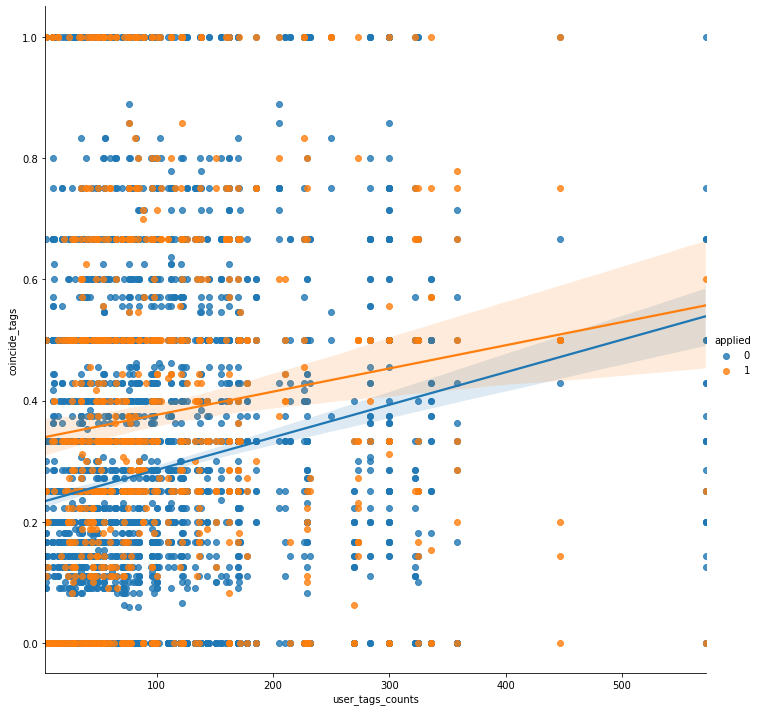

In [21]:
sns.lmplot(x="user_tags_counts", y="coincide_tags", hue="applied", height=10, data=train_all)
plt.show()

In [22]:
def set_df(df,user_tags,job_tags):
    
    df['user_tags_counts'] = 0
    df['job_tags_counts'] = 0
    df['coincide_tags'] = 0
    for i in range(len(df)):
        df['user_tags_counts'].iloc[i] =len( user_tags[user_tags['userID'] == df['userID'].iloc[i]])
        df['job_tags_counts'].iloc[i] =len( job_tags[job_tags['jobID'] == df['jobID'].iloc[i]])
        df['coincide_tags'].iloc[i] = calculate_tags_ratio(df['userID'].iloc[i], df['jobID'].iloc[i])
        
    return df

a = set_df(test,user_tags,job_tags)
a

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,userID,jobID,user_tags_counts,job_tags_counts,coincide_tags
0,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885,143,7,0.428571
1,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63,48,7,0.142857
2,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087,78,7,0.142857
3,ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f,15,4,0.000000
4,d41e0e6f6f1e29098d9d152511503ab2,4a213d37242bdcad8e7300e202e7caa4,100,6,0.000000
...,...,...,...,...,...
2430,01ed443356f762e9132b58f8c80e131d,26e359e83860db1d11b6acca57d8ea88,82,4,0.000000
2431,946aa0c612952da8d67dd338a43d5929,c0f168ce8900fa56e57789e2a2f2c9d0,30,3,0.666667
2432,ce840aa9583592e71f3db26ee6e41703,8065d07da4a77621450aa84fee5656d9,170,4,0.500000
2433,946aa0c612952da8d67dd338a43d5929,a0160709701140704575d499c997b6ca,30,3,0.333333


In [23]:
X = train_all[['user_tags_counts','coincide_tags']]
y = train_all[['applied']]

test_df_X = test[['user_tags_counts','coincide_tags']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2, random_state = 42)

# (모델 1) XGB 모델 사용해보기
## 캐글에서 성능이 좋아 많은 유저들에게 사랑 받는다고 하던데, 나도 한 번 써보자!

In [25]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# 실행하는데 속도가 너무 느리다..;
# xgb = xgb.XGBClassifier()


# grid = {
#     "n_estimators" : [200,400],
#     "learning_rate" : [0.1, 0.2],
#     "max_depth" : [4,6]
# }

# xgb_grid = GridSearchCV(xgb, param_grid=grid, scoring="accuracy", n_jobs=-1, verbose=1)

# xgb_grid.fit(X_train,y_train)

In [26]:
# print("XGBoost 최고 평균 정확도 : {0: .4f}".format(xgb_grid.best_score_))
# print("최고 파라미터", xgb_grid.best_params_)

In [27]:
model = xgb.XGBClassifier(learning_rate=0.1,max_depth=3,n_estimators=200) 

# 모델 훈련
model.fit(X_train,y_train) 

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1194: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[01:45:18] WARNING: /tmp/xgboost/src/learner.cc:1094: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
model.score(X_test,y_test)

0.88

In [29]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
test_df_y = model.predict(test_df_X)

In [31]:
result = pd.DataFrame(test_df_y)

In [32]:
result

,0
0,0
1,0
2,0
3,0
4,0
...,...
2430,0
2431,0
2432,0
2433,0


In [ ]:
test_df = pd.read_csv("./sample_output_job.csv")
# test_df
test_df = result
test_df

In [ ]:
test_df.to_csv('recommendation.csv', index=False)

# (모델 2)LGBM 모델 사용해보기

## XGB와 LGBM 모델의 성능 차이 비교해보기

In [33]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
lgbm = LGBMClassifier(n_estimators=200)

In [41]:
params = {'max_depth': [10, 15, 20],
          'min_child_samples': [20, 40, 60],
          'subsample': [0.8, 1]}

grid = GridSearchCV(lgbm, param_grid=params)
lgbm_model = grid.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
         eval_set=[(X_train, y_train), (X_test, y_test)])

print("최적 파라미터: ", grid.best_params_)
lgbm_roc_score = roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1], average='macro')
print("ROC AUC: {0:.4f}".format(lgbm_roc_score))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[1]	valid_0's auc: 0.668864	valid_0's binary_logloss: 0.41296	valid_1's auc: 0.571762	valid_1's binary_logloss: 0.374764
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.678974	valid_0's binary_logloss: 0.408618	valid_1's auc: 0.578351	valid_1's binary_logloss: 0.373915
[3]	valid_0's auc: 0.686574	valid_0's binary_logloss: 0.40443	valid_1's auc: 0.575031	valid_1's binary_logloss: 0.373642
[4]	valid_0's auc: 0.691391	valid_0's binary_logloss: 0.401566	valid_1's auc: 0.583599	valid_1's binary_logloss: 0.372948
[5]	valid_0's auc: 0.697705	valid_0's binary_logloss: 0.398301	valid_1's auc: 0.589623	valid_1's binary_logloss: 0.371706
[6]	valid_0's auc: 0.702454	valid_0's binary_logloss: 0.395982	valid_1's auc: 0.595301	valid_1's binary_logloss: 0.371028
[7]	valid_0's auc: 0.703903	valid_0's binary_logloss: 0.394091	valid_1's auc: 0.596155	valid_1's binary_logloss: 0.370752
[8]	valid_0's auc: 0.706041	valid_0's binary_logloss: 0.392381	valid_1's auc: 0.599787

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[52]	valid_0's auc: 0.780117	valid_0's binary_logloss: 0.352459	valid_1's auc: 0.581614	valid_1's binary_logloss: 0.391182
[53]	valid_0's auc: 0.780561	valid_0's binary_logloss: 0.352049	valid_1's auc: 0.581505	valid_1's binary_logloss: 0.39127
[54]	valid_0's auc: 0.781323	valid_0's binary_logloss: 0.351548	valid_1's auc: 0.582912	valid_1's binary_logloss: 0.391115
[55]	valid_0's auc: 0.781908	valid_0's binary_logloss: 0.351086	valid_1's auc: 0.582436	valid_1's binary_logloss: 0.39132
[56]	valid_0's auc: 0.782571	valid_0's binary_logloss: 0.350606	valid_1's auc: 0.583197	valid_1's binary_logloss: 0.391442
[57]	valid_0's auc: 0.782932	valid_0's binary_logloss: 0.350299	valid_1's auc: 0.583596	valid_1's binary_logloss: 0.39148
[58]	valid_0's auc: 0.783417	valid_0's binary_logloss: 0.349961	valid_1's auc: 0.584617	valid_1's binary_logloss: 0.392133
[59]	valid_0's auc: 0.783953	valid_0's binary_logloss: 0.34962	valid_1's auc: 0.584752	valid_1's binary_logloss: 0.392107
[60]	valid_0's auc: 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[1]	valid_0's auc: 0.686997	valid_0's binary_logloss: 0.412787	valid_1's auc: 0.573965	valid_1's binary_logloss: 0.374528
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.700581	valid_0's binary_logloss: 0.407822	valid_1's auc: 0.580532	valid_1's binary_logloss: 0.373123
[3]	valid_0's auc: 0.706019	valid_0's binary_logloss: 0.403921	valid_1's auc: 0.583637	valid_1's binary_logloss: 0.37257
[4]	valid_0's auc: 0.707639	valid_0's binary_logloss: 0.400597	valid_1's auc: 0.586884	valid_1's binary_logloss: 0.371794
[5]	valid_0's auc: 0.710187	valid_0's binary_logloss: 0.397749	valid_1's auc: 0.586383	valid_1's binary_logloss: 0.371523
[6]	valid_0's auc: 0.713678	valid_0's binary_logloss: 0.394982	valid_1's auc: 0.588808	valid_1's binary_logloss: 0.371289
[7]	valid_0's auc: 0.716333	valid_0's binary_logloss: 0.393015	valid_1's auc: 0.590079	valid_1's binary_logloss: 0.370965
[8]	valid_0's auc: 0.718074	valid_0's binary_logloss: 0.391208	valid_1's auc: 0.59088

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[50]	valid_0's auc: 0.765911	valid_0's binary_logloss: 0.356869	valid_1's auc: 0.608551	valid_1's binary_logloss: 0.37742
[51]	valid_0's auc: 0.766555	valid_0's binary_logloss: 0.356481	valid_1's auc: 0.609483	valid_1's binary_logloss: 0.377394
[52]	valid_0's auc: 0.766886	valid_0's binary_logloss: 0.356316	valid_1's auc: 0.609829	valid_1's binary_logloss: 0.377469
[53]	valid_0's auc: 0.767082	valid_0's binary_logloss: 0.356172	valid_1's auc: 0.610073	valid_1's binary_logloss: 0.377546
[54]	valid_0's auc: 0.768013	valid_0's binary_logloss: 0.355625	valid_1's auc: 0.608673	valid_1's binary_logloss: 0.377805
[55]	valid_0's auc: 0.767789	valid_0's binary_logloss: 0.355575	valid_1's auc: 0.608397	valid_1's binary_logloss: 0.377991
[56]	valid_0's auc: 0.768134	valid_0's binary_logloss: 0.355409	valid_1's auc: 0.608628	valid_1's binary_logloss: 0.377938
[57]	valid_0's auc: 0.768336	valid_0's binary_logloss: 0.355258	valid_1's auc: 0.608545	valid_1's binary_logloss: 0.378141
[58]	valid_0's au

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[1]	valid_0's auc: 0.692593	valid_0's binary_logloss: 0.412375	valid_1's auc: 0.563393	valid_1's binary_logloss: 0.37451
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.704122	valid_0's binary_logloss: 0.407283	valid_1's auc: 0.56593	valid_1's binary_logloss: 0.373696
[3]	valid_0's auc: 0.708894	valid_0's binary_logloss: 0.40299	valid_1's auc: 0.560541	valid_1's binary_logloss: 0.37319
[4]	valid_0's auc: 0.711421	valid_0's binary_logloss: 0.399528	valid_1's auc: 0.557378	valid_1's binary_logloss: 0.373461
[5]	valid_0's auc: 0.717683	valid_0's binary_logloss: 0.396445	valid_1's auc: 0.560011	valid_1's binary_logloss: 0.373522
[6]	valid_0's auc: 0.720147	valid_0's binary_logloss: 0.393784	valid_1's auc: 0.559947	valid_1's binary_logloss: 0.373527
[7]	valid_0's auc: 0.722513	valid_0's binary_logloss: 0.391239	valid_1's auc: 0.558861	valid_1's binary_logloss: 0.374109
[8]	valid_0's auc: 0.726361	valid_0's binary_logloss: 0.388841	valid_1's auc: 0.559767	v

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[100]	valid_0's auc: 0.788851	valid_0's binary_logloss: 0.344165	valid_1's auc: 0.613728	valid_1's binary_logloss: 0.381365
[101]	valid_0's auc: 0.789326	valid_0's binary_logloss: 0.343954	valid_1's auc: 0.615006	valid_1's binary_logloss: 0.381114
[102]	valid_0's auc: 0.789354	valid_0's binary_logloss: 0.343793	valid_1's auc: 0.615751	valid_1's binary_logloss: 0.380931
[103]	valid_0's auc: 0.789721	valid_0's binary_logloss: 0.343508	valid_1's auc: 0.614929	valid_1's binary_logloss: 0.381285
[104]	valid_0's auc: 0.78994	valid_0's binary_logloss: 0.343368	valid_1's auc: 0.615013	valid_1's binary_logloss: 0.381453
[105]	valid_0's auc: 0.790181	valid_0's binary_logloss: 0.343192	valid_1's auc: 0.615379	valid_1's binary_logloss: 0.381283
[106]	valid_0's auc: 0.790331	valid_0's binary_logloss: 0.343084	valid_1's auc: 0.615796	valid_1's binary_logloss: 0.38137
[107]	valid_0's auc: 0.790669	valid_0's binary_logloss: 0.342871	valid_1's auc: 0.615199	valid_1's binary_logloss: 0.381856
[108]	vali

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[46]	valid_0's auc: 0.746169	valid_0's binary_logloss: 0.367724	valid_1's auc: 0.590047	valid_1's binary_logloss: 0.37946
[47]	valid_0's auc: 0.74686	valid_0's binary_logloss: 0.367311	valid_1's auc: 0.5897	valid_1's binary_logloss: 0.379826
[48]	valid_0's auc: 0.747453	valid_0's binary_logloss: 0.366973	valid_1's auc: 0.59024	valid_1's binary_logloss: 0.379891
[49]	valid_0's auc: 0.747632	valid_0's binary_logloss: 0.366728	valid_1's auc: 0.589598	valid_1's binary_logloss: 0.37997
[50]	valid_0's auc: 0.748446	valid_0's binary_logloss: 0.366475	valid_1's auc: 0.588612	valid_1's binary_logloss: 0.380291
[51]	valid_0's auc: 0.748733	valid_0's binary_logloss: 0.366284	valid_1's auc: 0.588862	valid_1's binary_logloss: 0.380375
[52]	valid_0's auc: 0.74933	valid_0's binary_logloss: 0.365936	valid_1's auc: 0.589627	valid_1's binary_logloss: 0.380406
[53]	valid_0's auc: 0.749727	valid_0's binary_logloss: 0.365665	valid_1's auc: 0.590025	valid_1's binary_logloss: 0.380411
[54]	valid_0's auc: 0.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[1]	valid_0's auc: 0.674021	valid_0's binary_logloss: 0.413373	valid_1's auc: 0.544837	valid_1's binary_logloss: 0.375732
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.68151	valid_0's binary_logloss: 0.409077	valid_1's auc: 0.548771	valid_1's binary_logloss: 0.375362
[3]	valid_0's auc: 0.686021	valid_0's binary_logloss: 0.405537	valid_1's auc: 0.553858	valid_1's binary_logloss: 0.375211
[4]	valid_0's auc: 0.695661	valid_0's binary_logloss: 0.401952	valid_1's auc: 0.558479	valid_1's binary_logloss: 0.374989
[5]	valid_0's auc: 0.696401	valid_0's binary_logloss: 0.399297	valid_1's auc: 0.560914	valid_1's binary_logloss: 0.375008
[6]	valid_0's auc: 0.700173	valid_0's binary_logloss: 0.396699	valid_1's auc: 0.566636	valid_1's binary_logloss: 0.374411
[7]	valid_0's auc: 0.700735	valid_0's binary_logloss: 0.394783	valid_1's auc: 0.574064	valid_1's binary_logloss: 0.373808
[8]	valid_0's auc: 0.703911	valid_0's binary_logloss: 0.392799	valid_1's auc: 0.57266

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[106]	valid_0's auc: 0.757913	valid_0's binary_logloss: 0.359206	valid_1's auc: 0.591955	valid_1's binary_logloss: 0.384494
[107]	valid_0's auc: 0.758138	valid_0's binary_logloss: 0.359118	valid_1's auc: 0.591679	valid_1's binary_logloss: 0.384569
[108]	valid_0's auc: 0.758251	valid_0's binary_logloss: 0.359072	valid_1's auc: 0.592225	valid_1's binary_logloss: 0.384573
Early stopping, best iteration is:
[8]	valid_0's auc: 0.693369	valid_0's binary_logloss: 0.3958	valid_1's auc: 0.577616	valid_1's binary_logloss: 0.373127
[1]	valid_0's auc: 0.679651	valid_0's binary_logloss: 0.413278	valid_1's auc: 0.573444	valid_1's binary_logloss: 0.374234
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.685573	valid_0's binary_logloss: 0.408837	valid_1's auc: 0.577433	valid_1's binary_logloss: 0.373205
[3]	valid_0's auc: 0.689102	valid_0's binary_logloss: 0.405222	valid_1's auc: 0.571508	valid_1's binary_logloss: 0.373041
[4]	valid_0's auc: 0.691694	valid_0's binary

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[39]	valid_0's auc: 0.744958	valid_0's binary_logloss: 0.369663	valid_1's auc: 0.577687	valid_1's binary_logloss: 0.384684
[40]	valid_0's auc: 0.745346	valid_0's binary_logloss: 0.369394	valid_1's auc: 0.576903	valid_1's binary_logloss: 0.384977
[41]	valid_0's auc: 0.745703	valid_0's binary_logloss: 0.369124	valid_1's auc: 0.576897	valid_1's binary_logloss: 0.385115
[42]	valid_0's auc: 0.746465	valid_0's binary_logloss: 0.368746	valid_1's auc: 0.578682	valid_1's binary_logloss: 0.384867
[43]	valid_0's auc: 0.746921	valid_0's binary_logloss: 0.368536	valid_1's auc: 0.57812	valid_1's binary_logloss: 0.384912
[44]	valid_0's auc: 0.74769	valid_0's binary_logloss: 0.368037	valid_1's auc: 0.57671	valid_1's binary_logloss: 0.385391
[45]	valid_0's auc: 0.748106	valid_0's binary_logloss: 0.36768	valid_1's auc: 0.575574	valid_1's binary_logloss: 0.385863
[46]	valid_0's auc: 0.748827	valid_0's binary_logloss: 0.367343	valid_1's auc: 0.576209	valid_1's binary_logloss: 0.385762
[47]	valid_0's auc:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[35]	valid_0's auc: 0.716998	valid_0's binary_logloss: 0.379335	valid_1's auc: 0.582228	valid_1's binary_logloss: 0.379114
[36]	valid_0's auc: 0.717568	valid_0's binary_logloss: 0.378986	valid_1's auc: 0.582093	valid_1's binary_logloss: 0.379327
[37]	valid_0's auc: 0.719023	valid_0's binary_logloss: 0.378494	valid_1's auc: 0.580827	valid_1's binary_logloss: 0.379608
[38]	valid_0's auc: 0.71937	valid_0's binary_logloss: 0.378203	valid_1's auc: 0.58077	valid_1's binary_logloss: 0.379702
[39]	valid_0's auc: 0.720435	valid_0's binary_logloss: 0.377757	valid_1's auc: 0.57909	valid_1's binary_logloss: 0.380313
[40]	valid_0's auc: 0.721086	valid_0's binary_logloss: 0.377392	valid_1's auc: 0.580041	valid_1's binary_logloss: 0.38038
[41]	valid_0's auc: 0.722137	valid_0's binary_logloss: 0.376877	valid_1's auc: 0.580956	valid_1's binary_logloss: 0.380533
[42]	valid_0's auc: 0.722574	valid_0's binary_logloss: 0.376659	valid_1's auc: 0.581483	valid_1's binary_logloss: 0.380728
[43]	valid_0's auc: 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[1]	valid_0's auc: 0.670001	valid_0's binary_logloss: 0.414102	valid_1's auc: 0.535062	valid_1's binary_logloss: 0.375567
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.678592	valid_0's binary_logloss: 0.410252	valid_1's auc: 0.53712	valid_1's binary_logloss: 0.37519
[3]	valid_0's auc: 0.683667	valid_0's binary_logloss: 0.406988	valid_1's auc: 0.532734	valid_1's binary_logloss: 0.375289
[4]	valid_0's auc: 0.687083	valid_0's binary_logloss: 0.404191	valid_1's auc: 0.541019	valid_1's binary_logloss: 0.375135
[5]	valid_0's auc: 0.688122	valid_0's binary_logloss: 0.401817	valid_1's auc: 0.542734	valid_1's binary_logloss: 0.375449
[6]	valid_0's auc: 0.692398	valid_0's binary_logloss: 0.39966	valid_1's auc: 0.54908	valid_1's binary_logloss: 0.375172
[7]	valid_0's auc: 0.693576	valid_0's binary_logloss: 0.397832	valid_1's auc: 0.551668	valid_1's binary_logloss: 0.375326
[8]	valid_0's auc: 0.699464	valid_0's binary_logloss: 0.39584	valid_1's auc: 0.556883	va

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[88]	valid_0's auc: 0.745068	valid_0's binary_logloss: 0.365751	valid_1's auc: 0.590574	valid_1's binary_logloss: 0.381801
[89]	valid_0's auc: 0.745385	valid_0's binary_logloss: 0.365594	valid_1's auc: 0.590728	valid_1's binary_logloss: 0.381866
[90]	valid_0's auc: 0.745465	valid_0's binary_logloss: 0.365424	valid_1's auc: 0.58927	valid_1's binary_logloss: 0.382465
[91]	valid_0's auc: 0.745997	valid_0's binary_logloss: 0.365211	valid_1's auc: 0.589736	valid_1's binary_logloss: 0.382326
[92]	valid_0's auc: 0.746324	valid_0's binary_logloss: 0.365092	valid_1's auc: 0.589482	valid_1's binary_logloss: 0.382495
[93]	valid_0's auc: 0.746988	valid_0's binary_logloss: 0.364789	valid_1's auc: 0.589816	valid_1's binary_logloss: 0.382477
[94]	valid_0's auc: 0.747546	valid_0's binary_logloss: 0.364584	valid_1's auc: 0.59016	valid_1's binary_logloss: 0.382522
[95]	valid_0's auc: 0.74779	valid_0's binary_logloss: 0.364389	valid_1's auc: 0.58989	valid_1's binary_logloss: 0.382599
[96]	valid_0's auc:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[35]	valid_0's auc: 0.716998	valid_0's binary_logloss: 0.379335	valid_1's auc: 0.582228	valid_1's binary_logloss: 0.379114
[36]	valid_0's auc: 0.717568	valid_0's binary_logloss: 0.378986	valid_1's auc: 0.582093	valid_1's binary_logloss: 0.379327
[37]	valid_0's auc: 0.719023	valid_0's binary_logloss: 0.378494	valid_1's auc: 0.580827	valid_1's binary_logloss: 0.379608
[38]	valid_0's auc: 0.71937	valid_0's binary_logloss: 0.378203	valid_1's auc: 0.58077	valid_1's binary_logloss: 0.379702
[39]	valid_0's auc: 0.720435	valid_0's binary_logloss: 0.377757	valid_1's auc: 0.57909	valid_1's binary_logloss: 0.380313
[40]	valid_0's auc: 0.721086	valid_0's binary_logloss: 0.377392	valid_1's auc: 0.580041	valid_1's binary_logloss: 0.38038
[41]	valid_0's auc: 0.722137	valid_0's binary_logloss: 0.376877	valid_1's auc: 0.580956	valid_1's binary_logloss: 0.380533
[42]	valid_0's auc: 0.722574	valid_0's binary_logloss: 0.376659	valid_1's auc: 0.581483	valid_1's binary_logloss: 0.380728
[43]	valid_0's auc: 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[1]	valid_0's auc: 0.670001	valid_0's binary_logloss: 0.414102	valid_1's auc: 0.535062	valid_1's binary_logloss: 0.375567
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.678592	valid_0's binary_logloss: 0.410252	valid_1's auc: 0.53712	valid_1's binary_logloss: 0.37519
[3]	valid_0's auc: 0.683667	valid_0's binary_logloss: 0.406988	valid_1's auc: 0.532734	valid_1's binary_logloss: 0.375289
[4]	valid_0's auc: 0.687083	valid_0's binary_logloss: 0.404191	valid_1's auc: 0.541019	valid_1's binary_logloss: 0.375135
[5]	valid_0's auc: 0.688122	valid_0's binary_logloss: 0.401817	valid_1's auc: 0.542734	valid_1's binary_logloss: 0.375449
[6]	valid_0's auc: 0.692398	valid_0's binary_logloss: 0.39966	valid_1's auc: 0.54908	valid_1's binary_logloss: 0.375172
[7]	valid_0's auc: 0.693576	valid_0's binary_logloss: 0.397832	valid_1's auc: 0.551668	valid_1's binary_logloss: 0.375326
[8]	valid_0's auc: 0.699464	valid_0's binary_logloss: 0.39584	valid_1's auc: 0.556883	va

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[25]	valid_0's auc: 0.745437	valid_0's binary_logloss: 0.368333	valid_1's auc: 0.601393	valid_1's binary_logloss: 0.374104
[26]	valid_0's auc: 0.746734	valid_0's binary_logloss: 0.367151	valid_1's auc: 0.602206	valid_1's binary_logloss: 0.374151
[27]	valid_0's auc: 0.747947	valid_0's binary_logloss: 0.366347	valid_1's auc: 0.602373	valid_1's binary_logloss: 0.374405
[28]	valid_0's auc: 0.750172	valid_0's binary_logloss: 0.365225	valid_1's auc: 0.601672	valid_1's binary_logloss: 0.374836
[29]	valid_0's auc: 0.75251	valid_0's binary_logloss: 0.364165	valid_1's auc: 0.600532	valid_1's binary_logloss: 0.375262
[30]	valid_0's auc: 0.753861	valid_0's binary_logloss: 0.36346	valid_1's auc: 0.601377	valid_1's binary_logloss: 0.375192
[31]	valid_0's auc: 0.754691	valid_0's binary_logloss: 0.362903	valid_1's auc: 0.602601	valid_1's binary_logloss: 0.375455
[32]	valid_0's auc: 0.756353	valid_0's binary_logloss: 0.362102	valid_1's auc: 0.601226	valid_1's binary_logloss: 0.376443
[33]	valid_0's au

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[62]	valid_0's auc: 0.785274	valid_0's binary_logloss: 0.345482	valid_1's auc: 0.599004	valid_1's binary_logloss: 0.387569
[63]	valid_0's auc: 0.785918	valid_0's binary_logloss: 0.345098	valid_1's auc: 0.599094	valid_1's binary_logloss: 0.387443
[64]	valid_0's auc: 0.786174	valid_0's binary_logloss: 0.344912	valid_1's auc: 0.599473	valid_1's binary_logloss: 0.387657
[65]	valid_0's auc: 0.78644	valid_0's binary_logloss: 0.344736	valid_1's auc: 0.59928	valid_1's binary_logloss: 0.387947
[66]	valid_0's auc: 0.787187	valid_0's binary_logloss: 0.344264	valid_1's auc: 0.599119	valid_1's binary_logloss: 0.387958
[67]	valid_0's auc: 0.787445	valid_0's binary_logloss: 0.344069	valid_1's auc: 0.599453	valid_1's binary_logloss: 0.388361
[68]	valid_0's auc: 0.788029	valid_0's binary_logloss: 0.343725	valid_1's auc: 0.601284	valid_1's binary_logloss: 0.388204
[69]	valid_0's auc: 0.788261	valid_0's binary_logloss: 0.343518	valid_1's auc: 0.601277	valid_1's binary_logloss: 0.388482
[70]	valid_0's auc

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[12]	valid_0's auc: 0.733266	valid_0's binary_logloss: 0.382775	valid_1's auc: 0.604714	valid_1's binary_logloss: 0.369199
[13]	valid_0's auc: 0.734801	valid_0's binary_logloss: 0.38133	valid_1's auc: 0.605655	valid_1's binary_logloss: 0.369139
[14]	valid_0's auc: 0.736397	valid_0's binary_logloss: 0.379974	valid_1's auc: 0.605645	valid_1's binary_logloss: 0.369086
[15]	valid_0's auc: 0.738988	valid_0's binary_logloss: 0.378123	valid_1's auc: 0.606374	valid_1's binary_logloss: 0.369049
[16]	valid_0's auc: 0.74059	valid_0's binary_logloss: 0.376854	valid_1's auc: 0.607752	valid_1's binary_logloss: 0.369182
[17]	valid_0's auc: 0.741889	valid_0's binary_logloss: 0.375937	valid_1's auc: 0.607402	valid_1's binary_logloss: 0.369229
[18]	valid_0's auc: 0.743185	valid_0's binary_logloss: 0.374833	valid_1's auc: 0.605472	valid_1's binary_logloss: 0.369606
[19]	valid_0's auc: 0.74447	valid_0's binary_logloss: 0.373833	valid_1's auc: 0.604357	valid_1's binary_logloss: 0.369945
[20]	valid_0's auc:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[47]	valid_0's auc: 0.768443	valid_0's binary_logloss: 0.354696	valid_1's auc: 0.605263	valid_1's binary_logloss: 0.378712
[48]	valid_0's auc: 0.769424	valid_0's binary_logloss: 0.354091	valid_1's auc: 0.60586	valid_1's binary_logloss: 0.378865
[49]	valid_0's auc: 0.769842	valid_0's binary_logloss: 0.353821	valid_1's auc: 0.607228	valid_1's binary_logloss: 0.378708
[50]	valid_0's auc: 0.771028	valid_0's binary_logloss: 0.353185	valid_1's auc: 0.608815	valid_1's binary_logloss: 0.378728
[51]	valid_0's auc: 0.771787	valid_0's binary_logloss: 0.352836	valid_1's auc: 0.609752	valid_1's binary_logloss: 0.378604
[52]	valid_0's auc: 0.772406	valid_0's binary_logloss: 0.352449	valid_1's auc: 0.609206	valid_1's binary_logloss: 0.37907
[53]	valid_0's auc: 0.773155	valid_0's binary_logloss: 0.352089	valid_1's auc: 0.609919	valid_1's binary_logloss: 0.379341
[54]	valid_0's auc: 0.773509	valid_0's binary_logloss: 0.351709	valid_1's auc: 0.610192	valid_1's binary_logloss: 0.379546
[55]	valid_0's auc

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[15]	valid_0's auc: 0.738037	valid_0's binary_logloss: 0.375993	valid_1's auc: 0.590147	valid_1's binary_logloss: 0.373312
[16]	valid_0's auc: 0.739915	valid_0's binary_logloss: 0.374867	valid_1's auc: 0.590558	valid_1's binary_logloss: 0.373683
[17]	valid_0's auc: 0.742532	valid_0's binary_logloss: 0.373616	valid_1's auc: 0.587343	valid_1's binary_logloss: 0.375007
[18]	valid_0's auc: 0.74332	valid_0's binary_logloss: 0.372559	valid_1's auc: 0.587661	valid_1's binary_logloss: 0.375093
[19]	valid_0's auc: 0.744804	valid_0's binary_logloss: 0.371588	valid_1's auc: 0.589106	valid_1's binary_logloss: 0.375226
[20]	valid_0's auc: 0.747312	valid_0's binary_logloss: 0.370339	valid_1's auc: 0.590664	valid_1's binary_logloss: 0.375388
[21]	valid_0's auc: 0.749631	valid_0's binary_logloss: 0.368946	valid_1's auc: 0.590391	valid_1's binary_logloss: 0.37564
[22]	valid_0's auc: 0.751211	valid_0's binary_logloss: 0.36797	valid_1's auc: 0.591297	valid_1's binary_logloss: 0.37601
[23]	valid_0's auc:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[47]	valid_0's auc: 0.776504	valid_0's binary_logloss: 0.353762	valid_1's auc: 0.601464	valid_1's binary_logloss: 0.377556
[48]	valid_0's auc: 0.777388	valid_0's binary_logloss: 0.353249	valid_1's auc: 0.600237	valid_1's binary_logloss: 0.378029
[49]	valid_0's auc: 0.778132	valid_0's binary_logloss: 0.352643	valid_1's auc: 0.599942	valid_1's binary_logloss: 0.378686
[50]	valid_0's auc: 0.778427	valid_0's binary_logloss: 0.352446	valid_1's auc: 0.600648	valid_1's binary_logloss: 0.378825
[51]	valid_0's auc: 0.778773	valid_0's binary_logloss: 0.352064	valid_1's auc: 0.598978	valid_1's binary_logloss: 0.379297
[52]	valid_0's auc: 0.779136	valid_0's binary_logloss: 0.351774	valid_1's auc: 0.599164	valid_1's binary_logloss: 0.379539
[53]	valid_0's auc: 0.779976	valid_0's binary_logloss: 0.35129	valid_1's auc: 0.597344	valid_1's binary_logloss: 0.380121
[54]	valid_0's auc: 0.780126	valid_0's binary_logloss: 0.350948	valid_1's auc: 0.598326	valid_1's binary_logloss: 0.380173
[55]	valid_0's au

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[1]	valid_0's auc: 0.687302	valid_0's binary_logloss: 0.41297	valid_1's auc: 0.56408	valid_1's binary_logloss: 0.374632
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.690797	valid_0's binary_logloss: 0.408593	valid_1's auc: 0.561081	valid_1's binary_logloss: 0.374014
[3]	valid_0's auc: 0.698853	valid_0's binary_logloss: 0.404948	valid_1's auc: 0.562426	valid_1's binary_logloss: 0.373694
[4]	valid_0's auc: 0.700308	valid_0's binary_logloss: 0.401675	valid_1's auc: 0.560088	valid_1's binary_logloss: 0.373679
[5]	valid_0's auc: 0.70091	valid_0's binary_logloss: 0.39913	valid_1's auc: 0.558833	valid_1's binary_logloss: 0.37384
[6]	valid_0's auc: 0.703427	valid_0's binary_logloss: 0.396726	valid_1's auc: 0.561922	valid_1's binary_logloss: 0.374032
[7]	valid_0's auc: 0.707684	valid_0's binary_logloss: 0.394555	valid_1's auc: 0.559472	valid_1's binary_logloss: 0.374621
[8]	valid_0's auc: 0.710613	valid_0's binary_logloss: 0.39255	valid_1's auc: 0.556536	val

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[40]	valid_0's auc: 0.750038	valid_0's binary_logloss: 0.365189	valid_1's auc: 0.589665	valid_1's binary_logloss: 0.382099
[41]	valid_0's auc: 0.750944	valid_0's binary_logloss: 0.364794	valid_1's auc: 0.590808	valid_1's binary_logloss: 0.381895
[42]	valid_0's auc: 0.751974	valid_0's binary_logloss: 0.364279	valid_1's auc: 0.589781	valid_1's binary_logloss: 0.382379
[43]	valid_0's auc: 0.752515	valid_0's binary_logloss: 0.363923	valid_1's auc: 0.590821	valid_1's binary_logloss: 0.382469
[44]	valid_0's auc: 0.752722	valid_0's binary_logloss: 0.363681	valid_1's auc: 0.592016	valid_1's binary_logloss: 0.382303
[45]	valid_0's auc: 0.753097	valid_0's binary_logloss: 0.363355	valid_1's auc: 0.593056	valid_1's binary_logloss: 0.382322
[46]	valid_0's auc: 0.753878	valid_0's binary_logloss: 0.362985	valid_1's auc: 0.592022	valid_1's binary_logloss: 0.38273
[47]	valid_0's auc: 0.754166	valid_0's binary_logloss: 0.362716	valid_1's auc: 0.593063	valid_1's binary_logloss: 0.382571
[48]	valid_0's au

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[19]	valid_0's auc: 0.727195	valid_0's binary_logloss: 0.378319	valid_1's auc: 0.589675	valid_1's binary_logloss: 0.374995
[20]	valid_0's auc: 0.728457	valid_0's binary_logloss: 0.377568	valid_1's auc: 0.588573	valid_1's binary_logloss: 0.37567
[21]	valid_0's auc: 0.729939	valid_0's binary_logloss: 0.376688	valid_1's auc: 0.588772	valid_1's binary_logloss: 0.376006
[22]	valid_0's auc: 0.731085	valid_0's binary_logloss: 0.37599	valid_1's auc: 0.590079	valid_1's binary_logloss: 0.376561
[23]	valid_0's auc: 0.732015	valid_0's binary_logloss: 0.375243	valid_1's auc: 0.58892	valid_1's binary_logloss: 0.377261
[24]	valid_0's auc: 0.733483	valid_0's binary_logloss: 0.374557	valid_1's auc: 0.588374	valid_1's binary_logloss: 0.377641
[25]	valid_0's auc: 0.734757	valid_0's binary_logloss: 0.373945	valid_1's auc: 0.587687	valid_1's binary_logloss: 0.378288
[26]	valid_0's auc: 0.736219	valid_0's binary_logloss: 0.373329	valid_1's auc: 0.587745	valid_1's binary_logloss: 0.378449
[27]	valid_0's auc:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[61]	valid_0's auc: 0.768675	valid_0's binary_logloss: 0.356295	valid_1's auc: 0.575847	valid_1's binary_logloss: 0.392825
[62]	valid_0's auc: 0.769079	valid_0's binary_logloss: 0.356091	valid_1's auc: 0.576078	valid_1's binary_logloss: 0.392821
[63]	valid_0's auc: 0.769199	valid_0's binary_logloss: 0.355951	valid_1's auc: 0.576174	valid_1's binary_logloss: 0.393069
[64]	valid_0's auc: 0.769532	valid_0's binary_logloss: 0.355735	valid_1's auc: 0.575557	valid_1's binary_logloss: 0.393287
[65]	valid_0's auc: 0.770345	valid_0's binary_logloss: 0.355286	valid_1's auc: 0.575442	valid_1's binary_logloss: 0.393381
[66]	valid_0's auc: 0.77079	valid_0's binary_logloss: 0.355089	valid_1's auc: 0.575487	valid_1's binary_logloss: 0.393579
[67]	valid_0's auc: 0.771664	valid_0's binary_logloss: 0.354626	valid_1's auc: 0.575333	valid_1's binary_logloss: 0.393797
[68]	valid_0's auc: 0.771679	valid_0's binary_logloss: 0.354461	valid_1's auc: 0.575236	valid_1's binary_logloss: 0.393806
[69]	valid_0's au

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[31]	valid_0's auc: 0.723825	valid_0's binary_logloss: 0.377296	valid_1's auc: 0.585532	valid_1's binary_logloss: 0.378484
[32]	valid_0's auc: 0.724718	valid_0's binary_logloss: 0.376759	valid_1's auc: 0.585551	valid_1's binary_logloss: 0.378593
[33]	valid_0's auc: 0.725754	valid_0's binary_logloss: 0.376268	valid_1's auc: 0.583971	valid_1's binary_logloss: 0.379181
[34]	valid_0's auc: 0.726505	valid_0's binary_logloss: 0.375828	valid_1's auc: 0.583926	valid_1's binary_logloss: 0.379279
[35]	valid_0's auc: 0.727073	valid_0's binary_logloss: 0.375401	valid_1's auc: 0.584405	valid_1's binary_logloss: 0.379368
[36]	valid_0's auc: 0.727979	valid_0's binary_logloss: 0.375051	valid_1's auc: 0.582706	valid_1's binary_logloss: 0.379882
[37]	valid_0's auc: 0.72895	valid_0's binary_logloss: 0.374539	valid_1's auc: 0.58313	valid_1's binary_logloss: 0.380102
[38]	valid_0's auc: 0.729225	valid_0's binary_logloss: 0.374255	valid_1's auc: 0.582912	valid_1's binary_logloss: 0.380345
[39]	valid_0's auc

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[90]	valid_0's auc: 0.761549	valid_0's binary_logloss: 0.358698	valid_1's auc: 0.57602	valid_1's binary_logloss: 0.388989
[91]	valid_0's auc: 0.761653	valid_0's binary_logloss: 0.358503	valid_1's auc: 0.576386	valid_1's binary_logloss: 0.388934
[92]	valid_0's auc: 0.762177	valid_0's binary_logloss: 0.358234	valid_1's auc: 0.577953	valid_1's binary_logloss: 0.388823
[93]	valid_0's auc: 0.762463	valid_0's binary_logloss: 0.358061	valid_1's auc: 0.577369	valid_1's binary_logloss: 0.388903
[94]	valid_0's auc: 0.762901	valid_0's binary_logloss: 0.357828	valid_1's auc: 0.577433	valid_1's binary_logloss: 0.388908
[95]	valid_0's auc: 0.763087	valid_0's binary_logloss: 0.357593	valid_1's auc: 0.577015	valid_1's binary_logloss: 0.388855
[96]	valid_0's auc: 0.76369	valid_0's binary_logloss: 0.35737	valid_1's auc: 0.576771	valid_1's binary_logloss: 0.388823
[97]	valid_0's auc: 0.764101	valid_0's binary_logloss: 0.357186	valid_1's auc: 0.57699	valid_1's binary_logloss: 0.38895
[98]	valid_0's auc: 0

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[38]	valid_0's auc: 0.73277	valid_0's binary_logloss: 0.372885	valid_1's auc: 0.575827	valid_1's binary_logloss: 0.384008
[39]	valid_0's auc: 0.733482	valid_0's binary_logloss: 0.372548	valid_1's auc: 0.574877	valid_1's binary_logloss: 0.384428
[40]	valid_0's auc: 0.734653	valid_0's binary_logloss: 0.372026	valid_1's auc: 0.576604	valid_1's binary_logloss: 0.384407
[41]	valid_0's auc: 0.734871	valid_0's binary_logloss: 0.371748	valid_1's auc: 0.577349	valid_1's binary_logloss: 0.384328
[42]	valid_0's auc: 0.735823	valid_0's binary_logloss: 0.371315	valid_1's auc: 0.577924	valid_1's binary_logloss: 0.38438
[43]	valid_0's auc: 0.736342	valid_0's binary_logloss: 0.371019	valid_1's auc: 0.579003	valid_1's binary_logloss: 0.384299
[44]	valid_0's auc: 0.736654	valid_0's binary_logloss: 0.370759	valid_1's auc: 0.580506	valid_1's binary_logloss: 0.384025
[45]	valid_0's auc: 0.736908	valid_0's binary_logloss: 0.370449	valid_1's auc: 0.580095	valid_1's binary_logloss: 0.384166
[46]	valid_0's auc

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[32]	valid_0's auc: 0.730259	valid_0's binary_logloss: 0.375634	valid_1's auc: 0.582677	valid_1's binary_logloss: 0.380658
[33]	valid_0's auc: 0.731261	valid_0's binary_logloss: 0.375024	valid_1's auc: 0.582549	valid_1's binary_logloss: 0.381237
[34]	valid_0's auc: 0.732411	valid_0's binary_logloss: 0.374484	valid_1's auc: 0.581393	valid_1's binary_logloss: 0.381714
[35]	valid_0's auc: 0.733226	valid_0's binary_logloss: 0.374	valid_1's auc: 0.581951	valid_1's binary_logloss: 0.381694
[36]	valid_0's auc: 0.73431	valid_0's binary_logloss: 0.373382	valid_1's auc: 0.581605	valid_1's binary_logloss: 0.382252
[37]	valid_0's auc: 0.735222	valid_0's binary_logloss: 0.3729	valid_1's auc: 0.580686	valid_1's binary_logloss: 0.382596
[38]	valid_0's auc: 0.735477	valid_0's binary_logloss: 0.372534	valid_1's auc: 0.579864	valid_1's binary_logloss: 0.383028
[39]	valid_0's auc: 0.736728	valid_0's binary_logloss: 0.37201	valid_1's auc: 0.579655	valid_1's binary_logloss: 0.383375
[40]	valid_0's auc: 0.7

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[87]	valid_0's auc: 0.760114	valid_0's binary_logloss: 0.359262	valid_1's auc: 0.579003	valid_1's binary_logloss: 0.391148
[88]	valid_0's auc: 0.760612	valid_0's binary_logloss: 0.359083	valid_1's auc: 0.579042	valid_1's binary_logloss: 0.391615
[89]	valid_0's auc: 0.760806	valid_0's binary_logloss: 0.358978	valid_1's auc: 0.578534	valid_1's binary_logloss: 0.391693
[90]	valid_0's auc: 0.76117	valid_0's binary_logloss: 0.358821	valid_1's auc: 0.577539	valid_1's binary_logloss: 0.391929
[91]	valid_0's auc: 0.76167	valid_0's binary_logloss: 0.358572	valid_1's auc: 0.579414	valid_1's binary_logloss: 0.391782
[92]	valid_0's auc: 0.76192	valid_0's binary_logloss: 0.358406	valid_1's auc: 0.578952	valid_1's binary_logloss: 0.39189
[93]	valid_0's auc: 0.761964	valid_0's binary_logloss: 0.358302	valid_1's auc: 0.5784	valid_1's binary_logloss: 0.392069
[94]	valid_0's auc: 0.762353	valid_0's binary_logloss: 0.358132	valid_1's auc: 0.579157	valid_1's binary_logloss: 0.391783
[95]	valid_0's auc: 0.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[35]	valid_0's auc: 0.729987	valid_0's binary_logloss: 0.375565	valid_1's auc: 0.587385	valid_1's binary_logloss: 0.377088
[36]	valid_0's auc: 0.730902	valid_0's binary_logloss: 0.375144	valid_1's auc: 0.586133	valid_1's binary_logloss: 0.377566
[37]	valid_0's auc: 0.731648	valid_0's binary_logloss: 0.37474	valid_1's auc: 0.585991	valid_1's binary_logloss: 0.377742
[38]	valid_0's auc: 0.732238	valid_0's binary_logloss: 0.374419	valid_1's auc: 0.586858	valid_1's binary_logloss: 0.377686
[39]	valid_0's auc: 0.732885	valid_0's binary_logloss: 0.374005	valid_1's auc: 0.586852	valid_1's binary_logloss: 0.378126
[40]	valid_0's auc: 0.733052	valid_0's binary_logloss: 0.373667	valid_1's auc: 0.586088	valid_1's binary_logloss: 0.378393
[41]	valid_0's auc: 0.733714	valid_0's binary_logloss: 0.373311	valid_1's auc: 0.586409	valid_1's binary_logloss: 0.37849
[42]	valid_0's auc: 0.733977	valid_0's binary_logloss: 0.373043	valid_1's auc: 0.586544	valid_1's binary_logloss: 0.378487
[43]	valid_0's au

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[79]	valid_0's auc: 0.793554	valid_0's binary_logloss: 0.340815	valid_1's auc: 0.601817	valid_1's binary_logloss: 0.393343
[80]	valid_0's auc: 0.793815	valid_0's binary_logloss: 0.340643	valid_1's auc: 0.601252	valid_1's binary_logloss: 0.393728
[81]	valid_0's auc: 0.794	valid_0's binary_logloss: 0.340526	valid_1's auc: 0.601335	valid_1's binary_logloss: 0.39408
[82]	valid_0's auc: 0.794472	valid_0's binary_logloss: 0.340168	valid_1's auc: 0.60095	valid_1's binary_logloss: 0.394241
[83]	valid_0's auc: 0.794892	valid_0's binary_logloss: 0.339954	valid_1's auc: 0.60156	valid_1's binary_logloss: 0.39424
[84]	valid_0's auc: 0.795173	valid_0's binary_logloss: 0.339754	valid_1's auc: 0.601271	valid_1's binary_logloss: 0.394665
[85]	valid_0's auc: 0.795536	valid_0's binary_logloss: 0.339473	valid_1's auc: 0.599942	valid_1's binary_logloss: 0.395331
[86]	valid_0's auc: 0.795794	valid_0's binary_logloss: 0.339167	valid_1's auc: 0.599864	valid_1's binary_logloss: 0.395724
[87]	valid_0's auc: 0.7

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[1]	valid_0's auc: 0.682369	valid_0's binary_logloss: 0.412805	valid_1's auc: 0.544272	valid_1's binary_logloss: 0.375589
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.69342	valid_0's binary_logloss: 0.40781	valid_1's auc: 0.544905	valid_1's binary_logloss: 0.375369
[3]	valid_0's auc: 0.701465	valid_0's binary_logloss: 0.403895	valid_1's auc: 0.54906	valid_1's binary_logloss: 0.375426
[4]	valid_0's auc: 0.708075	valid_0's binary_logloss: 0.399863	valid_1's auc: 0.556308	valid_1's binary_logloss: 0.375167
[5]	valid_0's auc: 0.711416	valid_0's binary_logloss: 0.396371	valid_1's auc: 0.555467	valid_1's binary_logloss: 0.375686
[6]	valid_0's auc: 0.714834	valid_0's binary_logloss: 0.39341	valid_1's auc: 0.561594	valid_1's binary_logloss: 0.375758
[7]	valid_0's auc: 0.718921	valid_0's binary_logloss: 0.390662	valid_1's auc: 0.565471	valid_1's binary_logloss: 0.375497
[8]	valid_0's auc: 0.723095	valid_0's binary_logloss: 0.388005	valid_1's auc: 0.569517	v

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[57]	valid_0's auc: 0.777185	valid_0's binary_logloss: 0.350461	valid_1's auc: 0.612736	valid_1's binary_logloss: 0.38031
[58]	valid_0's auc: 0.77773	valid_0's binary_logloss: 0.350177	valid_1's auc: 0.612614	valid_1's binary_logloss: 0.380565
[59]	valid_0's auc: 0.777865	valid_0's binary_logloss: 0.350025	valid_1's auc: 0.612922	valid_1's binary_logloss: 0.38086
[60]	valid_0's auc: 0.778563	valid_0's binary_logloss: 0.349576	valid_1's auc: 0.612704	valid_1's binary_logloss: 0.38122
[61]	valid_0's auc: 0.779122	valid_0's binary_logloss: 0.349173	valid_1's auc: 0.612508	valid_1's binary_logloss: 0.381742
[62]	valid_0's auc: 0.77958	valid_0's binary_logloss: 0.348914	valid_1's auc: 0.612989	valid_1's binary_logloss: 0.38203
[63]	valid_0's auc: 0.780148	valid_0's binary_logloss: 0.348585	valid_1's auc: 0.613754	valid_1's binary_logloss: 0.38191
[64]	valid_0's auc: 0.780863	valid_0's binary_logloss: 0.348223	valid_1's auc: 0.613905	valid_1's binary_logloss: 0.381874
[65]	valid_0's auc: 0.7

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[10]	valid_0's auc: 0.727653	valid_0's binary_logloss: 0.384045	valid_1's auc: 0.575394	valid_1's binary_logloss: 0.374763
[11]	valid_0's auc: 0.730159	valid_0's binary_logloss: 0.382144	valid_1's auc: 0.57787	valid_1's binary_logloss: 0.374963
[12]	valid_0's auc: 0.733021	valid_0's binary_logloss: 0.380332	valid_1's auc: 0.57532	valid_1's binary_logloss: 0.375797
[13]	valid_0's auc: 0.735963	valid_0's binary_logloss: 0.378677	valid_1's auc: 0.57752	valid_1's binary_logloss: 0.375793
[14]	valid_0's auc: 0.739405	valid_0's binary_logloss: 0.376627	valid_1's auc: 0.579366	valid_1's binary_logloss: 0.375665
[15]	valid_0's auc: 0.740771	valid_0's binary_logloss: 0.3752	valid_1's auc: 0.581605	valid_1's binary_logloss: 0.375713
[16]	valid_0's auc: 0.743814	valid_0's binary_logloss: 0.373243	valid_1's auc: 0.583531	valid_1's binary_logloss: 0.375741
[17]	valid_0's auc: 0.744821	valid_0's binary_logloss: 0.372337	valid_1's auc: 0.582427	valid_1's binary_logloss: 0.376755
[18]	valid_0's auc: 0

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[41]	valid_0's auc: 0.774476	valid_0's binary_logloss: 0.35493	valid_1's auc: 0.595247	valid_1's binary_logloss: 0.378135
[42]	valid_0's auc: 0.775323	valid_0's binary_logloss: 0.354416	valid_1's auc: 0.596293	valid_1's binary_logloss: 0.378294
[43]	valid_0's auc: 0.77622	valid_0's binary_logloss: 0.353917	valid_1's auc: 0.597327	valid_1's binary_logloss: 0.378046
[44]	valid_0's auc: 0.77713	valid_0's binary_logloss: 0.353382	valid_1's auc: 0.596223	valid_1's binary_logloss: 0.378668
[45]	valid_0's auc: 0.777934	valid_0's binary_logloss: 0.352816	valid_1's auc: 0.59727	valid_1's binary_logloss: 0.378507
[46]	valid_0's auc: 0.778741	valid_0's binary_logloss: 0.352222	valid_1's auc: 0.598535	valid_1's binary_logloss: 0.378487
[47]	valid_0's auc: 0.779571	valid_0's binary_logloss: 0.351791	valid_1's auc: 0.597841	valid_1's binary_logloss: 0.378994
[48]	valid_0's auc: 0.780196	valid_0's binary_logloss: 0.351344	valid_1's auc: 0.598124	valid_1's binary_logloss: 0.378794
[49]	valid_0's auc: 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[92]	valid_0's auc: 0.77905	valid_0's binary_logloss: 0.34834	valid_1's auc: 0.58901	valid_1's binary_logloss: 0.392476
[93]	valid_0's auc: 0.779418	valid_0's binary_logloss: 0.348145	valid_1's auc: 0.58849	valid_1's binary_logloss: 0.39279
[94]	valid_0's auc: 0.779533	valid_0's binary_logloss: 0.347943	valid_1's auc: 0.588676	valid_1's binary_logloss: 0.392835
[95]	valid_0's auc: 0.77992	valid_0's binary_logloss: 0.347737	valid_1's auc: 0.589594	valid_1's binary_logloss: 0.392625
[96]	valid_0's auc: 0.780467	valid_0's binary_logloss: 0.347479	valid_1's auc: 0.588952	valid_1's binary_logloss: 0.392718
[97]	valid_0's auc: 0.780671	valid_0's binary_logloss: 0.347319	valid_1's auc: 0.589427	valid_1's binary_logloss: 0.392972
[98]	valid_0's auc: 0.780896	valid_0's binary_logloss: 0.347171	valid_1's auc: 0.589074	valid_1's binary_logloss: 0.392817
[99]	valid_0's auc: 0.78118	valid_0's binary_logloss: 0.346949	valid_1's auc: 0.589511	valid_1's binary_logloss: 0.392806
[100]	valid_0's auc: 0.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[7]	valid_0's auc: 0.701324	valid_0's binary_logloss: 0.394649	valid_1's auc: 0.570345	valid_1's binary_logloss: 0.374624
[8]	valid_0's auc: 0.702445	valid_0's binary_logloss: 0.392943	valid_1's auc: 0.56655	valid_1's binary_logloss: 0.375291
[9]	valid_0's auc: 0.705218	valid_0's binary_logloss: 0.391111	valid_1's auc: 0.566293	valid_1's binary_logloss: 0.375581
[10]	valid_0's auc: 0.707915	valid_0's binary_logloss: 0.389575	valid_1's auc: 0.564648	valid_1's binary_logloss: 0.37613
[11]	valid_0's auc: 0.709093	valid_0's binary_logloss: 0.388327	valid_1's auc: 0.565191	valid_1's binary_logloss: 0.376792
[12]	valid_0's auc: 0.711451	valid_0's binary_logloss: 0.386977	valid_1's auc: 0.567169	valid_1's binary_logloss: 0.377298
[13]	valid_0's auc: 0.713633	valid_0's binary_logloss: 0.385518	valid_1's auc: 0.568698	valid_1's binary_logloss: 0.377523
[14]	valid_0's auc: 0.71784	valid_0's binary_logloss: 0.38386	valid_1's auc: 0.571713	valid_1's binary_logloss: 0.377452
[15]	valid_0's auc: 0.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[64]	valid_0's auc: 0.763978	valid_0's binary_logloss: 0.356661	valid_1's auc: 0.591123	valid_1's binary_logloss: 0.385599
[65]	valid_0's auc: 0.764381	valid_0's binary_logloss: 0.356357	valid_1's auc: 0.591868	valid_1's binary_logloss: 0.385616
[66]	valid_0's auc: 0.765068	valid_0's binary_logloss: 0.356061	valid_1's auc: 0.59253	valid_1's binary_logloss: 0.386057
[67]	valid_0's auc: 0.765457	valid_0's binary_logloss: 0.355773	valid_1's auc: 0.593159	valid_1's binary_logloss: 0.38618
[68]	valid_0's auc: 0.766487	valid_0's binary_logloss: 0.355356	valid_1's auc: 0.592921	valid_1's binary_logloss: 0.386409
[69]	valid_0's auc: 0.766891	valid_0's binary_logloss: 0.355039	valid_1's auc: 0.593047	valid_1's binary_logloss: 0.38632
[70]	valid_0's auc: 0.76702	valid_0's binary_logloss: 0.354999	valid_1's auc: 0.592873	valid_1's binary_logloss: 0.386569
[71]	valid_0's auc: 0.767636	valid_0's binary_logloss: 0.35468	valid_1's auc: 0.592199	valid_1's binary_logloss: 0.386839
[72]	valid_0's auc: 0

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[12]	valid_0's auc: 0.711451	valid_0's binary_logloss: 0.386977	valid_1's auc: 0.567169	valid_1's binary_logloss: 0.377298
[13]	valid_0's auc: 0.713633	valid_0's binary_logloss: 0.385518	valid_1's auc: 0.568698	valid_1's binary_logloss: 0.377523
[14]	valid_0's auc: 0.71784	valid_0's binary_logloss: 0.38386	valid_1's auc: 0.571713	valid_1's binary_logloss: 0.377452
[15]	valid_0's auc: 0.721121	valid_0's binary_logloss: 0.382481	valid_1's auc: 0.576168	valid_1's binary_logloss: 0.377409
[16]	valid_0's auc: 0.723122	valid_0's binary_logloss: 0.3814	valid_1's auc: 0.576341	valid_1's binary_logloss: 0.377622
[17]	valid_0's auc: 0.724719	valid_0's binary_logloss: 0.380319	valid_1's auc: 0.575936	valid_1's binary_logloss: 0.378283
[18]	valid_0's auc: 0.725972	valid_0's binary_logloss: 0.37938	valid_1's auc: 0.574578	valid_1's binary_logloss: 0.379198
[19]	valid_0's auc: 0.728333	valid_0's binary_logloss: 0.378211	valid_1's auc: 0.578631	valid_1's binary_logloss: 0.378893
[20]	valid_0's auc: 0

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[42]	valid_0's auc: 0.751988	valid_0's binary_logloss: 0.364494	valid_1's auc: 0.586242	valid_1's binary_logloss: 0.38068
[43]	valid_0's auc: 0.753067	valid_0's binary_logloss: 0.363968	valid_1's auc: 0.585972	valid_1's binary_logloss: 0.380969
[44]	valid_0's auc: 0.753775	valid_0's binary_logloss: 0.363536	valid_1's auc: 0.586544	valid_1's binary_logloss: 0.381029
[45]	valid_0's auc: 0.754728	valid_0's binary_logloss: 0.363122	valid_1's auc: 0.58725	valid_1's binary_logloss: 0.381043
[46]	valid_0's auc: 0.755574	valid_0's binary_logloss: 0.362633	valid_1's auc: 0.587745	valid_1's binary_logloss: 0.380996
[47]	valid_0's auc: 0.756533	valid_0's binary_logloss: 0.362187	valid_1's auc: 0.587202	valid_1's binary_logloss: 0.381266
[48]	valid_0's auc: 0.757956	valid_0's binary_logloss: 0.361701	valid_1's auc: 0.58935	valid_1's binary_logloss: 0.381048
[49]	valid_0's auc: 0.758648	valid_0's binary_logloss: 0.361262	valid_1's auc: 0.589575	valid_1's binary_logloss: 0.381002
[50]	valid_0's auc

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[2]	valid_0's auc: 0.677399	valid_0's binary_logloss: 0.410237	valid_1's auc: 0.533517	valid_1's binary_logloss: 0.375264
[3]	valid_0's auc: 0.682913	valid_0's binary_logloss: 0.406986	valid_1's auc: 0.531006	valid_1's binary_logloss: 0.37535
[4]	valid_0's auc: 0.687234	valid_0's binary_logloss: 0.404105	valid_1's auc: 0.535178	valid_1's binary_logloss: 0.375439
[5]	valid_0's auc: 0.688734	valid_0's binary_logloss: 0.401702	valid_1's auc: 0.538472	valid_1's binary_logloss: 0.375737
[6]	valid_0's auc: 0.693028	valid_0's binary_logloss: 0.399473	valid_1's auc: 0.544722	valid_1's binary_logloss: 0.375567
[7]	valid_0's auc: 0.69511	valid_0's binary_logloss: 0.39753	valid_1's auc: 0.549899	valid_1's binary_logloss: 0.375534
[8]	valid_0's auc: 0.701654	valid_0's binary_logloss: 0.39501	valid_1's auc: 0.55539	valid_1's binary_logloss: 0.375748
[9]	valid_0's auc: 0.704607	valid_0's binary_logloss: 0.393138	valid_1's auc: 0.556125	valid_1's binary_logloss: 0.376325
[10]	valid_0's auc: 0.706973	

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[48]	valid_0's auc: 0.741918	valid_0's binary_logloss: 0.368321	valid_1's auc: 0.580253	valid_1's binary_logloss: 0.38544
[49]	valid_0's auc: 0.742754	valid_0's binary_logloss: 0.367799	valid_1's auc: 0.579559	valid_1's binary_logloss: 0.385266
[50]	valid_0's auc: 0.743637	valid_0's binary_logloss: 0.367286	valid_1's auc: 0.578974	valid_1's binary_logloss: 0.385886
[51]	valid_0's auc: 0.743919	valid_0's binary_logloss: 0.367065	valid_1's auc: 0.578461	valid_1's binary_logloss: 0.385953
[52]	valid_0's auc: 0.744656	valid_0's binary_logloss: 0.36672	valid_1's auc: 0.579263	valid_1's binary_logloss: 0.386097
[53]	valid_0's auc: 0.74529	valid_0's binary_logloss: 0.366332	valid_1's auc: 0.579899	valid_1's binary_logloss: 0.386095
[54]	valid_0's auc: 0.746125	valid_0's binary_logloss: 0.365929	valid_1's auc: 0.579732	valid_1's binary_logloss: 0.386642
[55]	valid_0's auc: 0.746834	valid_0's binary_logloss: 0.365528	valid_1's auc: 0.578673	valid_1's binary_logloss: 0.386929
[56]	valid_0's auc

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[1]	valid_0's auc: 0.666201	valid_0's binary_logloss: 0.414218	valid_1's auc: 0.568248	valid_1's binary_logloss: 0.374746
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.672875	valid_0's binary_logloss: 0.410426	valid_1's auc: 0.566505	valid_1's binary_logloss: 0.374058
[3]	valid_0's auc: 0.674594	valid_0's binary_logloss: 0.40739	valid_1's auc: 0.570435	valid_1's binary_logloss: 0.373429
[4]	valid_0's auc: 0.682391	valid_0's binary_logloss: 0.404285	valid_1's auc: 0.570561	valid_1's binary_logloss: 0.373316
[5]	valid_0's auc: 0.685494	valid_0's binary_logloss: 0.401803	valid_1's auc: 0.567568	valid_1's binary_logloss: 0.373458
[6]	valid_0's auc: 0.686376	valid_0's binary_logloss: 0.399759	valid_1's auc: 0.566222	valid_1's binary_logloss: 0.373919
[7]	valid_0's auc: 0.689437	valid_0's binary_logloss: 0.397889	valid_1's auc: 0.56927	valid_1's binary_logloss: 0.373944
[8]	valid_0's auc: 0.694607	valid_0's binary_logloss: 0.395841	valid_1's auc: 0.573631

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[40]	valid_0's auc: 0.743517	valid_0's binary_logloss: 0.370185	valid_1's auc: 0.569144	valid_1's binary_logloss: 0.389654
[41]	valid_0's auc: 0.743803	valid_0's binary_logloss: 0.369805	valid_1's auc: 0.569096	valid_1's binary_logloss: 0.38994
[42]	valid_0's auc: 0.74524	valid_0's binary_logloss: 0.36937	valid_1's auc: 0.568602	valid_1's binary_logloss: 0.390338
[43]	valid_0's auc: 0.745898	valid_0's binary_logloss: 0.369023	valid_1's auc: 0.568692	valid_1's binary_logloss: 0.390703
[44]	valid_0's auc: 0.746551	valid_0's binary_logloss: 0.368711	valid_1's auc: 0.570516	valid_1's binary_logloss: 0.390674
[45]	valid_0's auc: 0.747268	valid_0's binary_logloss: 0.368237	valid_1's auc: 0.571254	valid_1's binary_logloss: 0.390756
[46]	valid_0's auc: 0.747639	valid_0's binary_logloss: 0.367791	valid_1's auc: 0.572272	valid_1's binary_logloss: 0.390599
[47]	valid_0's auc: 0.748703	valid_0's binary_logloss: 0.367197	valid_1's auc: 0.571431	valid_1's binary_logloss: 0.390927
[48]	valid_0's auc:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[3]	training's auc: 0.716485	training's binary_logloss: 0.402435	valid_1's auc: 0.586476	valid_1's binary_logloss: 0.37211
[4]	training's auc: 0.719361	training's binary_logloss: 0.398614	valid_1's auc: 0.590352	valid_1's binary_logloss: 0.371401
[5]	training's auc: 0.723109	training's binary_logloss: 0.395472	valid_1's auc: 0.594749	valid_1's binary_logloss: 0.371001
[6]	training's auc: 0.726005	training's binary_logloss: 0.392932	valid_1's auc: 0.59392	valid_1's binary_logloss: 0.370786
[7]	training's auc: 0.730239	training's binary_logloss: 0.39016	valid_1's auc: 0.593204	valid_1's binary_logloss: 0.371264
[8]	training's auc: 0.734494	training's binary_logloss: 0.38773	valid_1's auc: 0.593474	valid_1's binary_logloss: 0.371386
[9]	training's auc: 0.737159	training's binary_logloss: 0.385636	valid_1's auc: 0.593185	valid_1's binary_logloss: 0.371305
[10]	training's auc: 0.739782	training's binary_logloss: 0.38362	valid_1's auc: 0.593618	valid_1's binary_logloss: 0.371235
[11]	trainin

In [66]:
# 위 결과를 적용하여 재학습
lgbm = LGBMClassifier(n_estimators=1000, num_leaves=40, subsample=0.8,
                      min_child_samples=20, max_depth=10)

evals = [(X_test, y_test)]
lgbm_model = lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
         eval_set=evals, verbose=True)

score = roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1], average='macro')
print("ROC AUC: {0:.4f}".format(score))

[1]	valid_0's auc: 0.58497	valid_0's binary_logloss: 0.374283
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.596534	valid_0's binary_logloss: 0.372398
[3]	valid_0's auc: 0.601438	valid_0's binary_logloss: 0.371672
[4]	valid_0's auc: 0.601146	valid_0's binary_logloss: 0.370705
[5]	valid_0's auc: 0.596942	valid_0's binary_logloss: 0.370302
[6]	valid_0's auc: 0.600202	valid_0's binary_logloss: 0.369756
[7]	valid_0's auc: 0.600866	valid_0's binary_logloss: 0.369861
[8]	valid_0's auc: 0.59797	valid_0's binary_logloss: 0.369693
[9]	valid_0's auc: 0.594222	valid_0's binary_logloss: 0.370652
[10]	valid_0's auc: 0.596255	valid_0's binary_logloss: 0.37019
[11]	valid_0's auc: 0.589845	valid_0's binary_logloss: 0.370752
[12]	valid_0's auc: 0.591605	valid_0's binary_logloss: 0.370473
[13]	valid_0's auc: 0.590821	valid_0's binary_logloss: 0.370789
[14]	valid_0's auc: 0.591688	valid_0's binary_logloss: 0.370944
[15]	valid_0's auc: 0.590327	valid_0's binary_logloss:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [67]:
lgbm_model.score(X_test,y_test)

0.8766666666666667

In [37]:
lgbm_result = pd.DataFrame(test_df_y)

In [38]:
lgbm_result

,0
0,0
1,0
2,0
3,0
4,0
...,...
2430,0
2431,0
2432,0
2433,0


In [39]:
test_df = pd.read_csv("./sample_output_job.csv")
# test_df
test_df = lgbm_result
test_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
2430,0
2431,0
2432,0
2433,0


In [40]:
test_df.to_csv('recommendation2.csv', index=False)